In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

import sys

sys.path.append("../")
import loss_functions as ls
from models import Model
from layers import Linear, Flatten
from activation_functions import Sigmoid, ReLU, Tanh, SoftMax

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm

In [2]:
import torch
from torchvision import datasets, transforms

# Define a transform to convert the data to tensors and normalize it
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

# Download and load the training data
trainset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False)

# Download and load the test data
testset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Convert the data to NumPy arrays
train_data = next(iter(trainloader))
x_train, y_train = train_data[0].numpy(), train_data[1].numpy()

test_data = next(iter(testloader))
x_test, y_test = test_data[0].numpy(), test_data[1].numpy()

# Reshape the data to the original shape (28x28)
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# Make it [sample size, batch size (in this case 1), 28*28]
x_train = x_train.reshape(-1, 1, 28 * 28)
x_test = x_test.reshape(-1, 1, 28 * 28)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

y_train = np.eye(10)[y_train]

print(f"Labeled data shape: {y_train.shape}, example: {y_train[0]}")

Training data shape: (64, 1, 784)
Test data shape: (64, 1, 784)
Labeled data shape: (64, 10), example: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
model = Model(ls.multi_cross_entropy)
model.add(Linear(28 * 28, 128, ReLU()))
model.add(Linear(128, 64, ReLU()))
model.add(Linear(64, 10, SoftMax()))

print(model)

Linear Layer (in 784, out 128), (activation relu)
Linear Layer (in 128, out 64), (activation relu)
Linear Layer (in 64, out 10), (activation softmax)


Train shape: (64, 1, 784), Test shape: (64, 1, 784)
Epoch 0, Loss 1550.2536726218273
Epoch 1, Loss nan
Epoch 2, Loss nan
Epoch 3, Loss nan
Epoch 4, Loss nan


/home/loic/Documents/Enlightenment/ml/neural-network-from-scratch/examples/../activation_functions.py:77: RuntimeWarning: invalid value encountered in subtract
  x_stable = x - np.max(x, axis=-1, keepdims=True)


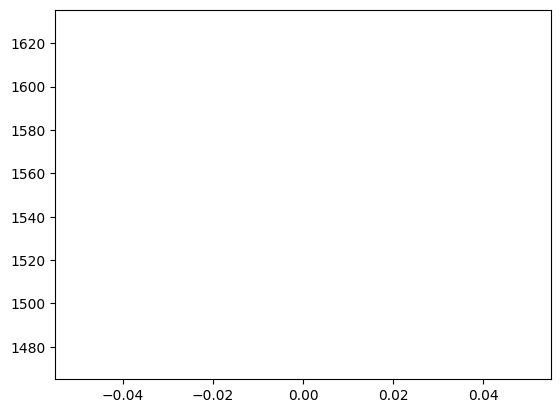

In [4]:
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

loss = model.fit(x_train, y_train, 5, 0.001)

plt.plot(loss)
plt.show()

In [ ]:
print(f"Test Size: {len(x_test)}")
predictions = []
for batch in x_test:
    predictions.append(model.predict(batch))

print(predictions)
predictions = np.array(predictions)
print(predictions.shape, y_test.shape)

In [ ]:
accuracy = np.mean((predictions > 0.5) == y_test)
print(f"Accuracy: {accuracy}")